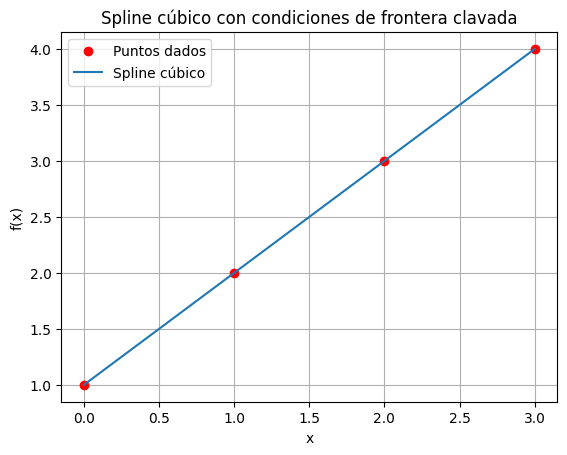

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def cubic_spline_clamped(xs: np.array, ys: np.array) -> callable:
    n = len(xs) - 1
    h = np.diff(xs)  # Diferencia entre los puntos consecutivos
    alpha = np.zeros(n + 1)
    
    # Condiciones de frontera clavada: f'(x0) y f'(xn) son especificadas
    # Supongamos f'(x0) = 0 y f'(xn) = 0, puedes ajustarlo si tienes otras condiciones
    alpha[0] = 0  # f'(x0) = 0
    alpha[n] = 0  # f'(xn) = 0

    # Construir el sistema de ecuaciones
    A = np.zeros((n + 1, n + 1))
    B = np.zeros(n + 1)

    # Configurar el sistema
    for i in range(1, n):
        A[i, i - 1] = h[i - 1]
        A[i, i] = 2 * (h[i - 1] + h[i])
        A[i, i + 1] = h[i]

    A[0, 0] = 1  # f'(x0) = 0
    A[n, n] = 1  # f'(xn) = 0

    # Resolver el sistema para los coeficientes c
    B[1:n] = 3 * (ys[2:] - ys[1:-1]) / h[1:] - 3 * (ys[1:-1] - ys[:-2]) / h[:-1]
    
    c = np.linalg.solve(A, B)

    # Calcular los coeficientes a, b y d
    a = ys[:-1]
    b = (ys[1:] - ys[:-1]) / h - h * (2 * c[:-1] + c[1:]) / 3
    d = (c[1:] - c[:-1]) / (3 * h)

    # Función spline cúbico
    def spline(x):
        for i in range(n):
            if x >= xs[i] and x <= xs[i + 1]:
                dx = x - xs[i]
                return a[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3

    return spline

# Ejemplo con datos de prueba
xs = np.array([0, 1, 2, 3])
ys = np.array([1, 2, 3, 4])

# Usar la función cubic_spline_clamped
spline = cubic_spline_clamped(xs, ys)

# Graficar
x_fine = np.linspace(0, 3, 100)
y_fine = [spline(x) for x in x_fine]

plt.plot(xs, ys, 'ro', label='Puntos dados')
plt.plot(x_fine, y_fine, label='Spline cúbico')
plt.title("Spline cúbico con condiciones de frontera clavada")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()
